In [2]:
%matplotlib inline

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline # Pepe (|) - Composition of functions (in Linux)

In [4]:
housing_data = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None)
housing_data.columns = ["crime_rate", "zoned_land", "industry", "bounds_river",
"nox_conc", "rooms", "age", "distance", "highways", "tax", "pt_ratio",
"b_estimator", "pop_status", "price"]
housing_data

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
housing_attributes = housing_data.drop(columns = "price")

In [6]:
housing_attributes.shape

(506, 13)

In [7]:
housing_prices = housing_data.price

In [8]:
housing_prices.shape

(506,)

In [9]:
#Preprocess the data
#1. Indicator veriables
housing_attributes_with_dummies = pd.get_dummies(housing_attributes)

#Normalization
scaler = MinMaxScaler()
housing_attributes_scaled = scaler.fit_transform(housing_attributes_with_dummies)

In [10]:
#Test a model 

linear_regression = LinearRegression()
linear_regression.fit(housing_attributes_scaled, housing_prices)

LinearRegression()

In [11]:
linear_regression.coef_

array([  2.08448854,   1.49403979,   0.34690497,   3.00565375,
        -7.54441381,  22.43940145,   0.27658754,  -9.35981793,
         1.35281035,  -1.26826011,  -9.07603108,   3.74177288,
       -19.03479847])

In [12]:
linear_regression.intercept_

23.689291534676972

In [13]:
linear_regression.score(housing_attributes_scaled, housing_prices)

0.7198065414937174

In [14]:
prediction = linear_regression.predict(housing_attributes_scaled)
np.sqrt(mean_squared_error(housing_prices, prediction))

4.86351800705635

# RANSACRegressor

In [15]:
#ransac algorithm settings
ransac = RANSACRegressor(
    base_estimator= LinearRegression(),
    max_trials= 200, 
    min_samples = 0.25 #part of the data
)

In [16]:
ransac.fit(housing_attributes_scaled, housing_prices)

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression(),
                max_trials=200, min_samples=0.25)

In [17]:
ransac.estimator_.coef_

array([-2.14513852e+00,  1.69041219e-02,  1.42901151e+00,  3.59316237e+00,
       -2.65865705e+00,  2.75051975e+01, -2.84895021e+00, -4.23429297e+00,
        1.02583730e+00, -1.76442632e+00, -6.81277747e+00,  3.39524496e+00,
       -1.20700577e+01])

In [18]:
ransac.inlier_mask_.sum() /len(housing_prices)

0.7569169960474308

In [19]:
inliers = housing_data[ransac.inlier_mask_]
outliers = housing_data[~ransac.inlier_mask_]

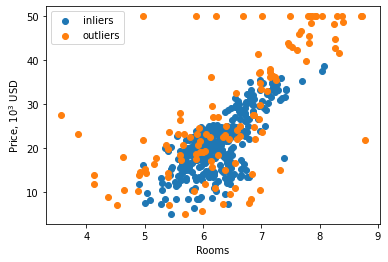

In [20]:
plt.scatter(inliers.rooms, inliers.price, label = "inliers")
plt.scatter(outliers.rooms, outliers.price, label = "outliers")

plt.xlabel("Rooms")
plt.ylabel("Price, $10^3$ USD")
plt.legend()
plt.show()

In [21]:
ransac.score(housing_attributes_scaled, housing_prices)

0.6794776933199265

In [22]:
ransac.score(housing_attributes_scaled[ransac.inlier_mask_], housing_prices[ransac.inlier_mask_])

0.9027676363263064

In [23]:
ransac.score(housing_attributes_scaled[~ransac.inlier_mask_], housing_prices[~ransac.inlier_mask_])

0.47558150016032297

## PolynomialFeatures

In [24]:
polinomial_features = PolynomialFeatures(degree=3,interaction_only= True)

In [25]:
housing_attributes_scaled_cubed = polinomial_features.fit_transform(housing_attributes_scaled)

In [26]:
polinomial_regression = LinearRegression()
polinomial_regression.fit(housing_attributes_scaled_cubed, housing_prices)

LinearRegression()

In [27]:
polinomial_regression.score(housing_attributes_scaled_cubed, housing_prices)

0.9671948495089068

In [30]:
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header= None)

In [36]:
iris_data.columns = ["sepal_length", "sepal_width ", "petal_length", "petal_width", "iris_types"]
iris_data

,sepal_length,sepal_width,petal_length,petal_width,iris_types
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
iris_attributes = iris_data.drop(columns= ["iris_types"])
iris_type = iris_data.iris_types

In [39]:
scaler = MinMaxScaler()
iris_attributes_scaled = scaler.fit_transform(iris_attributes)

In [46]:
logistic_regression = LogisticRegression(C=1e9)

In [47]:
logistic_regression.fit(iris_attributes_scaled, iris_type)

LogisticRegression(C=1000000000.0)

In [48]:
logistic_regression.coef_

array([[-18.29679129,  29.19813694, -37.89417388, -38.3219437 ],
       [ 13.58611302,  -6.58018128,  -8.87560643,  -2.78717031],
       [  4.71067827, -22.61795566,  46.76978031,  41.10911401]])

In [49]:
logistic_regression.predict(iris_attributes_scaled)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [50]:
logistic_regression.score(iris_attributes_scaled, iris_type)

0.9866666666666667

In [51]:
logistic_regression.predict_proba(iris_attributes_scaled[:10])

array([[1.00000000e+00, 1.02292805e-10, 1.55808686e-37],
       [9.99999970e-01, 3.00429452e-08, 2.11688322e-33],
       [1.00000000e+00, 1.58498332e-10, 1.87108297e-36],
       [9.99999999e-01, 7.76309552e-10, 1.50865607e-34],
       [1.00000000e+00, 9.50140661e-12, 9.49275281e-39],
       [1.00000000e+00, 3.16855709e-10, 1.04473560e-35],
       [1.00000000e+00, 2.38321856e-11, 1.51289189e-36],
       [1.00000000e+00, 3.06373975e-10, 2.99146537e-36],
       [9.99999998e-01, 1.59234854e-09, 7.50862174e-34],
       [9.99999997e-01, 2.51705408e-09, 3.74891346e-35]])

In [57]:
#wrong way C = 1e-9 Huge regularization
logistic_regression = LogisticRegression(C = 1e-9)
logistic_regression.fit(iris_attributes_scaled, iris_type)
logistic_regression.score(iris_attributes_scaled, iris_type)

0.35333333333333333

In [53]:
iris_attributes_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [76]:
log_regr_pipe = Pipeline([
    ("square_features", PolynomialFeatures(degree=2, interaction_only= False)),
    ("min_max_scling", MinMaxScaler()),
    ("logistic_regression", LogisticRegression(C = 1))
], verbose = True)

In [77]:
log_regr_pipe.fit(iris_attributes,iris_type)

[Pipeline] ... (step 1 of 3) Processing square_features, total=   0.0s
[Pipeline] .... (step 2 of 3) Processing min_max_scling, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logistic_regression, total=   0.0s


Pipeline(steps=[('square_features', PolynomialFeatures()),
                ('min_max_scling', MinMaxScaler()),
                ('logistic_regression', LogisticRegression(C=1))],
         verbose=True)

In [78]:
log_regr_pipe.steps

[('square_features', PolynomialFeatures()),
 ('min_max_scling', MinMaxScaler()),
 ('logistic_regression', LogisticRegression(C=1))]

In [79]:
log_regr_pipe.score(iris_attributes,iris_type)

0.96